In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb #python -m pip install seaborn
import os
import datetime as dt
%matplotlib inline

# import geoviews
# import forium

In [6]:
data_dir = r'C:\Users\alexa\Documents\GeorgiaTech\Classes\Year4\CS4641'
datasets = os.listdir(data_dir)
print(datasets)

['US_Accidents_Dec19.csv', 'US_WeatherEvents_2016-2019.csv']


In [ ]:
main_dataset = pd.read_csv(data_dir+'\\'+datasets[0])

In [ ]:
print(main_dataset.shape)
print(main_dataset.dtypes)

In [24]:
print(main_dataset.describe())

                TMC      Severity     Start_Lat     Start_Lng        End_Lat  \
count  2.246264e+06  2.974335e+06  2.974335e+06  2.974335e+06  728071.000000   
mean   2.078316e+02  2.360190e+00  3.649361e+01 -9.542625e+01      37.580871   
std    2.032959e+01  5.414733e-01  4.918849e+00  1.721881e+01       5.004757   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02      24.570110   
25%    2.010000e+02  2.000000e+00  3.355040e+01 -1.172920e+02      33.957554   
50%    2.010000e+02  2.000000e+00  3.584969e+01 -9.025083e+01      37.903670   
75%    2.010000e+02  3.000000e+00  4.037026e+01 -8.091891e+01      41.372630   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01      49.075000   

             End_Lng  Distance(mi)        Number  Temperature(F)  \
count  728071.000000  2.974335e+06  1.056730e+06    2.918272e+06   
mean      -99.976032  2.855654e-01  5.837004e+03    6.235120e+01   
std        18.416647  1.548392e+00  1.515928e+04    1.878855e+01   
min    

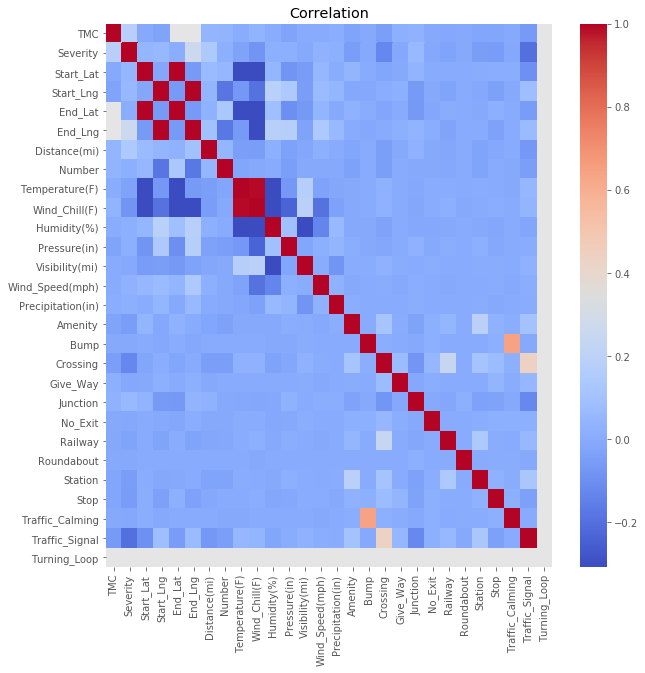

In [25]:
corr = main_dataset.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 10)) 
sb.heatmap(corr, ax = ax,cmap='coolwarm',  robust=True)
ax.set_title('Correlation')
plt.show()

In [38]:
print(main_dataset.iloc[0:2, 0:10])

    ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   

   Start_Lat  Start_Lng  End_Lat  End_Lng  
0  39.865147 -84.058723      NaN      NaN  
1  39.928059 -82.831184      NaN      NaN  


In [27]:
main_dataset['date'] = main_dataset['Start_Time'].str.split(n=1).str[0]
main_dataset['Date'] = pd.to_datetime(main_dataset['date'], errors='coerce')
main_dataset['Week'] = main_dataset['Date'] .dt.week
main_dataset['Year'] = main_dataset['Date'] .dt.year

Text(0,0.5,'Number of Accidents')

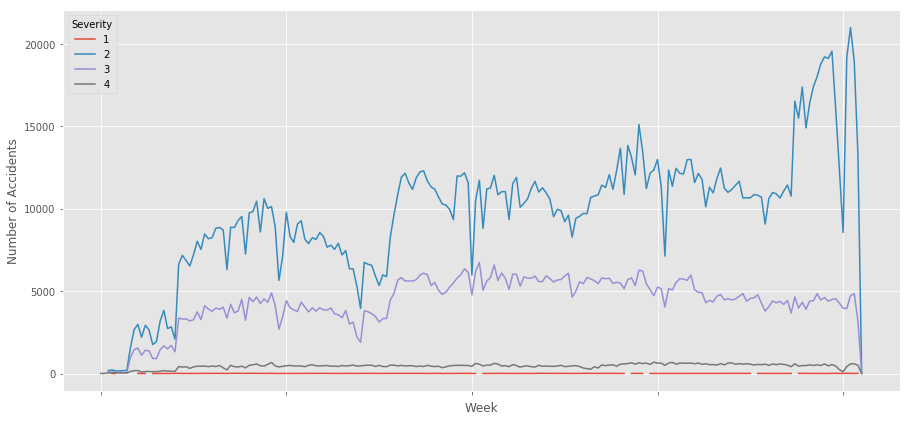

In [28]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,7))
main_dataset.groupby(['Year','Week','Severity']).count()['ID'].unstack().plot(ax=ax)
plt.xticks(hours)
ax.set_xlabel('Week')
ax.set_ylabel('Number of Accidents')

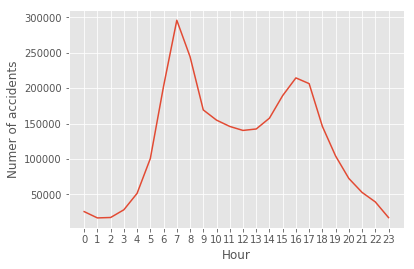

In [29]:
main_dataset['timestamp'] = pd.to_datetime(main_dataset['Weather_Timestamp'], errors='coerce')
main_dataset['Hour'] = main_dataset['timestamp'].dt.hour
main_dataset['Minute'] = main_dataset['timestamp'].dt.minute
hours = [hour for hour, df in main_dataset.groupby('Hour')]
plt.plot(hours, main_dataset.groupby(['Hour'])['ID'].count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of accidents')
plt.grid(True)
plt.show()

In [7]:
weather_dataset = pd.read_csv(data_dir+'\\'+datasets[1])

In [8]:
print(weather_dataset.shape)
print(weather_dataset.dtypes)

(5059833, 13)
EventId            object
Type               object
Severity           object
StartTime(UTC)     object
EndTime(UTC)       object
TimeZone           object
AirportCode        object
LocationLat       float64
LocationLng       float64
City               object
County             object
State              object
ZipCode           float64
dtype: object


In [9]:
print(weather_dataset.describe())

        LocationLat   LocationLng       ZipCode
count  5.059833e+06  5.059833e+06  5.021148e+06
mean   3.882645e+01 -9.203908e+01  5.277158e+04
std    5.489153e+00  1.337799e+01  2.555838e+04
min    2.455710e+01 -1.245550e+02  1.022000e+03
25%    3.460690e+01 -9.800580e+01  3.172100e+04
50%    3.945200e+01 -9.011010e+01  5.450100e+04
75%    4.311110e+01 -8.215590e+01  7.364700e+04
max    4.894020e+01 -6.779280e+01  9.936200e+04


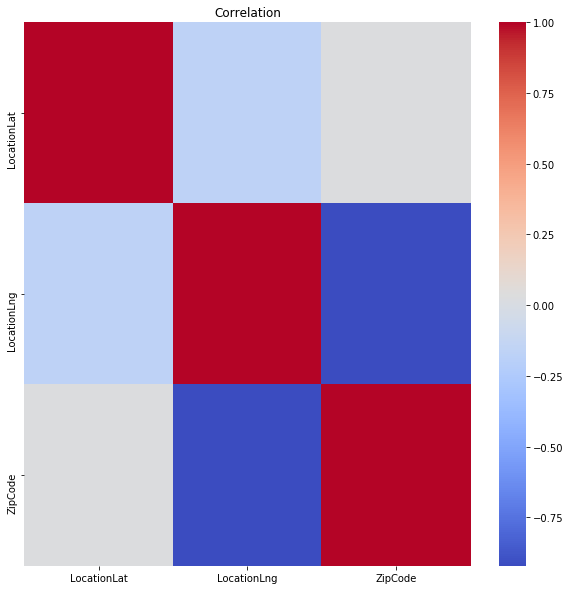

In [10]:
corr = weather_dataset.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 10)) 
sb.heatmap(corr, ax = ax,cmap='coolwarm',  robust=True)
ax.set_title('Correlation')
plt.show()

In [11]:
print(weather_dataset.iloc[0:50, 1:3])

     Type  Severity
0    Snow     Light
1    Snow     Light
2    Snow     Light
3    Snow     Light
4    Snow     Light
5    Snow     Light
6     Fog    Severe
7    Snow     Light
8     Fog    Severe
9    Snow     Light
10   Cold    Severe
11    Fog    Severe
12    Fog    Severe
13   Snow     Light
14    Fog    Severe
15    Fog    Severe
16   Cold    Severe
17   Cold    Severe
18   Snow     Light
19   Snow     Light
20   Snow     Light
21   Snow     Light
22   Snow     Light
23   Snow     Light
24   Snow     Light
25   Snow     Light
26   Snow     Light
27   Snow     Light
28   Snow     Light
29   Snow     Light
30   Snow     Light
31   Snow     Light
32   Snow     Light
33   Snow     Light
34   Snow     Light
35   Snow     Light
36   Snow     Light
37    Fog  Moderate
38   Snow     Light
39   Snow     Light
40   Snow     Light
41   Snow     Light
42   Snow     Light
43   Snow     Light
44   Snow     Light
45   Snow     Light
46   Snow     Light
47   Cold    Severe
48  Storm    Severe


In [12]:
weather_dataset_clean = pd.concat([weather_dataset['EventId'], weather_dataset['Type'], weather_dataset['Severity']], axis=1)
weather_dataset_clean['StartTime'] = pd.to_datetime(weather_dataset['StartTime(UTC)'], errors='coerce')
weather_dataset_clean['EndTime'] = pd.to_datetime(weather_dataset['EndTime(UTC)'], errors='coerce')

weather_dataset_clean['StartHour'] = weather_dataset_clean['StartTime'].dt.hour
weather_dataset_clean['StartMinute'] = weather_dataset_clean['StartTime'].dt.minute
weather_dataset_clean['EndHour'] = weather_dataset_clean['EndTime'].dt.hour
weather_dataset_clean['EndMinute'] = weather_dataset_clean['EndTime'].dt.minute

In [13]:
# print(weather_dataset_clean.iloc[0:2, :])

print(weather_dataset_clean.shape)
print(weather_dataset_clean.dtypes)
print(weather_dataset_clean.describe())

(5059833, 9)
EventId                object
Type                   object
Severity               object
StartTime      datetime64[ns]
EndTime        datetime64[ns]
StartHour               int64
StartMinute             int64
EndHour                 int64
EndMinute               int64
dtype: object
          StartHour   StartMinute       EndHour     EndMinute
count  5.059833e+06  5.059833e+06  5.059833e+06  5.059833e+06
mean   1.163914e+01  3.590246e+01  1.171943e+01  3.622651e+01
std    6.854273e+00  1.777445e+01  6.853260e+00  1.786412e+01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    6.000000e+00  1.600000e+01  6.000000e+00  1.600000e+01
50%    1.200000e+01  3.500000e+01  1.200000e+01  3.600000e+01
75%    1.800000e+01  5.300000e+01  1.800000e+01  5.300000e+01
max    2.300000e+01  5.900000e+01  2.300000e+01  5.900000e+01


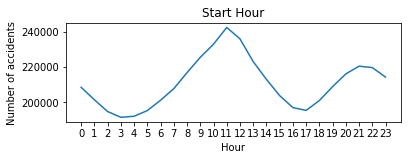

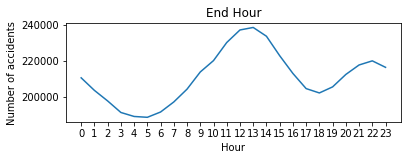

In [14]:
hours = [hour for hour, df in weather_dataset_clean.groupby('StartHour')]

fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(hours, weather_dataset_clean.groupby(['StartHour'])['EventId'].count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of accidents')
plt.title('Start Hour')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(hours, weather_dataset_clean.groupby(['EndHour'])['EventId'].count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of accidents')
plt.title('End Hour')
plt.show()

In [15]:
# ax = weather_dataset_clean.plot.bar(x='Severity', rot=0)

In [20]:
test = weather_dataset.drop('TimeZone', 1)

In [21]:
print(test.shape)
print(test.dtypes)

(5059833, 12)
EventId            object
Type               object
Severity           object
StartTime(UTC)     object
EndTime(UTC)       object
AirportCode        object
LocationLat       float64
LocationLng       float64
City               object
County             object
State              object
ZipCode           float64
dtype: object
